# Week 36

## Exercise 1
### Ex1a)
Last week we showed that 
\begin{gather}
    \frac{\partial (\mathbf{x} - \mathbf{A}\mathbf{s})^T(\mathbf{x} - \mathbf{A}\mathbf{s})}{\partial \mathbf{s}} = -2(\mathbf{x} - \mathbf{A}\mathbf{s})^T\mathbf{A}
\end{gather}
which then showed that the differentiating the OLS cost function gives
\begin{gather}
    \frac{\partial C_{OLS}(\mathbf{\beta})}{\partial \mathbf{\beta}} = \frac{\partial (\mathbf{y} - \mathbf{X}\mathbf{\beta})^T(\mathbf{y} - \mathbf{X}\mathbf{\beta})}{\partial \mathbf{\beta}} = -2(\mathbf{y} - \mathbf{X}\mathbf{\beta})^T\mathbf{X}
\end{gather}
which gave us the optimal $\mathbf{\hat{\beta}}_{OLS}$ when setting $\frac{\partial C_{OLS}}{\partial \mathbf{\beta}}=0$
\begin{gather}
    \mathbf{\hat{\beta}}_{OLS} = (\mathbf{X}^T\mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
\end{gather}

For the ridge cost function all we are changing are adding a term $\lambda |\mathbf{\beta}|^2$, so we can use this result when differentiating the new cost function $C_{ridge}=C_{OLS} + \lambda |\mathbf{\beta}|^2$:
\begin{gather}
    \frac{\partial C_{ridge}(\mathbf{\beta})}{\partial \mathbf{\beta}} = \frac{\partial C_{OLS}(\mathbf{\beta})}{\partial \mathbf{\beta}} + \frac{\partial}{\partial \mathbf{\beta}} (\lambda |\mathbf{\beta}|^2)
    \\ = -2(\mathbf{y} - \mathbf{X}\mathbf{\beta})^T\mathbf{X} + \frac{\partial}{\partial \mathbf{\beta}} (\lambda \sum_{i=0}^{P-1} \beta_i^2)
    \\ = 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{X} - 2\mathbf{y}^T\mathbf{X} + \lambda \begin{pmatrix} \frac{\partial \sum_{i=0}^{P-1} \beta_i^2}{\partial \beta_0} & ... & \frac{\partial \sum_{i=0}^{P-1} \beta_i^2}{\partial \beta_{P-1}}\end{pmatrix}
    \\ = 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{X} - 2\mathbf{y}^T\mathbf{X} + \lambda \begin{pmatrix} 2b_0 & ... & 2b_{P-1}\end{pmatrix} 
    \\ = 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{X} - 2\mathbf{y}^T\mathbf{X} + 2\lambda \mathbf{\beta}^T
\end{gather}
We now set the differential equal to zero to minimise, and solve for the optimal $\mathbf{\hat{\beta}}$:
\begin{gather}
    2\mathbf{\hat{\beta}}_{ridge}^T\mathbf{X}^T\mathbf{X} - 2\mathbf{y}^T\mathbf{X} + 2\lambda \mathbf{\hat{\beta}}_{ridge}^T = 0
    \\ \mathbf{\hat{\beta}}_{ridge}^T \mathbf{X}^T\mathbf{X} + \lambda \mathbf{\hat{\beta}}_{ridge}^T = \mathbf{y}^T\mathbf{X}
    \\ \mathbf{\hat{\beta}}_{ridge}^T \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right) = \mathbf{y}^T\mathbf{X}
    \\ \mathbf{\hat{\beta}}_{ridge} \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right)^T = \mathbf{X}^T\mathbf{y}
    \\ \mathbf{\hat{\beta}}_{ridge} \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right) = \mathbf{X}^T\mathbf{y}
    \\ \mathbf{\hat{\beta}}_{ridge} = \left( \mathbf{X}^T\mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^T\mathbf{y}
\end{gather}
which is the result we wanted to show.

### Ex1b)


## Exercise 2

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def RegressionComparision(x, y, maxdegree, lmbda_vals):
    # Create design matrix
    X = np.zeros((n, maxdegree))
    for degree in range(maxdegree):
        X[:, degree] = x[:, 0]**degree
        
    # Identity matrix
    I = np.identity(maxdegree)
    
    # Create design matrix
    X = np.zeros((n, maxdegree))
    for degree in range(maxdegree):
        X[:, degree] = x[:, 0]**(degree+1)  # Exclude the intercept
    
    # Split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
    # Scale
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    train_mse_ols = np.zeros(len(lmbda_vals))
    test_mse_ols = np.zeros_like(train_mse_ols)
    train_mse_rid = np.zeros_like(train_mse_ols)
    test_mse_rid = np.zeros_like(train_mse_ols)
    for i, lmbda in enumerate(lmbda_vals):
        # Linear regression/OLS
        beta_ols = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lmbda * I) @ X_train_scaled.T @ y_train
        y_tilde_ols = X_train_scaled @ beta_ols
        y_predict_ols = X_test_scaled @ beta_ols 
        
        # Ridge regression
        beta_rid = (np.linalg.inv(X_train_scaled.T @ X_train_scaled + lmbda * I)
                @ X_train_scaled.T @ y_train)
        y_tilde_rid = X_train_scaled @ beta_rid 
        y_predict_rid = X_test_scaled @ beta_rid 
        
        # Calculate MSE's
        train_mse_ols[i] = mean_squared_error(y_train, y_tilde_ols)
        test_mse_ols[i] = mean_squared_error(y_test, y_predict_ols)
        train_mse_rid[i] = mean_squared_error(y_train, y_tilde_rid)
        test_mse_rid[i] = mean_squared_error(y_test, y_predict_rid)
        
    # Plot OLS MSE's
    plt.plot(lmbda_vals, train_mse_ols, "r-", label="OLS Train")
    plt.plot(lmbda_vals, test_mse_ols, "r--", label="OLS Test")
    
    # Plot ridge MSE's
    plt.plot(lmbda_vals, train_mse_rid, "b-", label="Ridge Train")
    plt.plot(lmbda_vals, test_mse_rid, "b--", label="Ridge Test")
    plt.legend()
    
    plt.xlabel("$\lambda$")
    plt.ylabel("MSE")
    plt.title(f"Polynomial degree = {maxdegree}")

In [40]:
# Parameters
n = 100
lmbda_vals = np.asarray([0.0001, 0.001, 0.01, 0.1, 1])

# Create random data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

### Polynomial of degree 5:

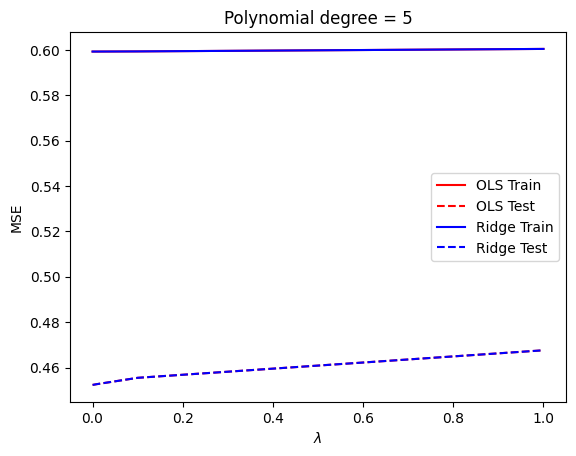

In [41]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=5)

### Polynomial of degree 10:

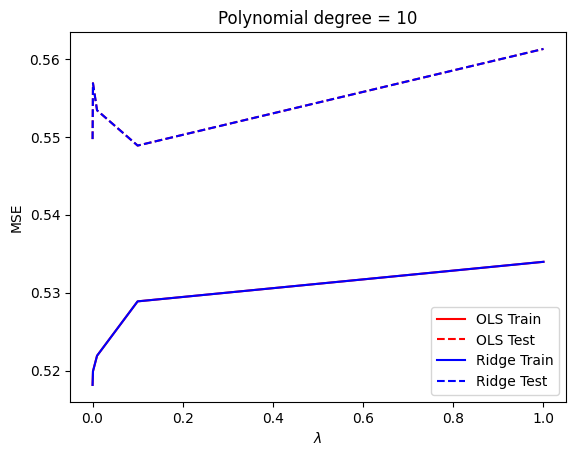

In [42]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=10)

### Polynomial of degree 15:

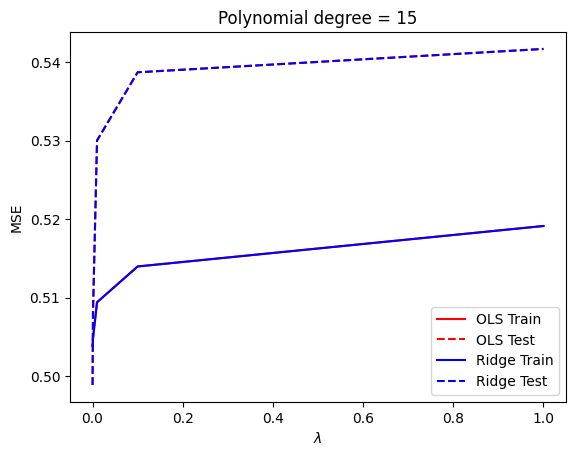

In [43]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=15)